In [ ]:
import os
train_dir = os.path.join('/content/drive/My Drive/SDC/IMG')
# test_dir = os.path.join('/content/drive/My Drive/dance/test')

In [ ]:
train_files = os.listdir(train_dir)
print('total training images:', len(os.listdir(train_dir)))
print(train_files[:8])

total training images: 5230
['right_2019_07_22_20_41_15_502.jpg', 'right_2019_07_22_20_41_20_310.jpg', 'right_2019_07_22_20_41_14_637.jpg', 'right_2019_07_22_20_41_17_963.jpg', 'right_2019_07_22_20_41_18_313.jpg', 'right_2019_07_22_20_41_18_685.jpg', 'right_2019_07_22_20_41_15_806.jpg', 'right_2019_07_22_20_41_18_453.jpg']


In [ ]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Lets retrieve the dataset from drive

In [ ]:
# get file names of frames
col_frames = os.listdir('/content/drive/My Drive/SDC/IMG')
# col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
col_frames.sort()
# print(col_frames)
# load frames
col_images=[]
Images=[]
for i in col_frames[:1500]:
    img = cv2.imread('/content/drive/My Drive/SDC/IMG/'+i)
    Images.append(img)
    col_images.append(img[65:140,0:320])# 65:140,0:320 is height and width pixel values where road is only visible not sky, hills, etc.
col_images=np.array(col_images)
Images=np.array(Images)
print(Images.shape)
print(col_images.shape)

(1500, 160, 320, 3)
(1500, 75, 320, 3)


Lets retrieve the labels for images

In [ ]:
import numpy as np

# write your code here
import csv
with open('/content/drive/My Drive/SDC/driving_log.csv') as file:
  csvreader=csv.reader(file)
  x=[]
  for row in csvreader:
    x.append(float(row[3]))

Y_data=np.array(x[:1500])
print(Y_data.shape)
print(Y_data)

(1500,)
[0. 0. 0. ... 0. 0. 0.]


Because most of the time the steering angle is 0 the y labels are mostly zero thus we need to remove this bias from the data. So we will take only few random iamges with y label = 0

In [ ]:
X=col_images[Y_data!=0]
Y=Y_data[Y_data!=0]

In [ ]:
A=col_images[Y_data==0]
B=Y_data[Y_data==0]

In [ ]:
number_of_rows = B.shape[0]
random_indices = np.random.choice(number_of_rows, size=150, replace=False)
X=np.concatenate((X,A[random_indices, :]),axis=0)
Y=np.concatenate((Y,B[random_indices]),axis=0)
print(X.shape)
print(Y.shape)

(455, 75, 320, 3)
(455,)


Steering angle y is between -1 to 1 

In [ ]:

# mean=Y.mean(axis=0)
# st=Y.std(axis=0)
# print(mean)
# print(st)
# Y=(Y-mean)/st
print(min(Y),max(Y))
print(X.shape)
print(Y.shape)

-1.0 1.0
(455, 75, 320, 3)
(455,)


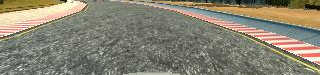

In [ ]:
# specify frame index
idx = 1
cv2_imshow(X[idx])

Lets prepare the Deep Learning model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(128, kernel_size=3, activation="relu", input_shape=(75,320,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(50, activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1, activation="tanh"))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 73, 318, 128)      3584      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 36, 159, 128)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 34, 157, 64)       73792     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 17, 78, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 15, 76, 32)        18464     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 38, 32)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 5, 36, 32)       

In [ ]:
model.compile(loss = "mean_squared_error", optimizer='adam')

In [ ]:
model.fit(X, Y, epochs=200,shuffle=True)

Epoch 1/200
15/15 [==============================] - 1s 59ms/step - loss: 0.2583
Epoch 2/200
15/15 [==============================] - 1s 57ms/step - loss: 0.2536
Epoch 3/200
15/15 [==============================] - 1s 56ms/step - loss: 0.2575
Epoch 4/200
15/15 [==============================] - 1s 57ms/step - loss: 0.2568
Epoch 5/200
15/15 [==============================] - 1s 57ms/step - loss: 0.2573
Epoch 6/200
15/15 [==============================] - 1s 56ms/step - loss: 0.2504
Epoch 7/200
15/15 [==============================] - 1s 57ms/step - loss: 0.2471
Epoch 8/200
15/15 [==============================] - 1s 57ms/step - loss: 0.2498
Epoch 9/200
15/15 [==============================] - 1s 58ms/step - loss: 0.2257
Epoch 10/200
15/15 [==============================] - 1s 57ms/step - loss: 0.2551
Epoch 11/200
15/15 [==============================] - 1s 57ms/step - loss: 0.2464
Epoch 12/200
15/15 [==============================] - 1s 57ms/step - loss: 0.2383
Epoch 13/200
15/15 [=====

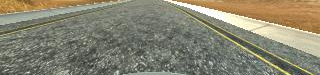

In [ ]:
test=X[101] #101 is the index of the image we are testing, you can put any value upto 455
cv2_imshow(test)

In [ ]:
test = np.expand_dims(test, axis=0) # to make it look like a batch we added a new dimension so that we can easily use model.predict()
test.shape

(1, 75, 320, 3)

In [ ]:
model.predict(test)[0][0]   # predicts the steering angle

-0.23799974

In [ ]:
test=X[100:105]  # lets see the same over a batch of 5 images
print(model.predict(test))
print(Y[100:105])  # actual steering angles when user was driving the car while collecting the dataset

[[-0.545344  ]
 [-0.23799975]
 [ 0.4086814 ]
 [ 0.1610203 ]
 [-0.5353438 ]]
[-0.7843707  -0.04646092  0.804567    0.09961647 -0.5205054 ]


Let import our test data (images + steering angle) and see how well it predicts the steering angle

In [ ]:
# get file names of frames
col_frames = os.listdir('/content/drive/My Drive/SDC/testing/IMG')
# col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))
col_frames.sort()
# print(col_frames)
# load frames
test=[]
for i in col_frames[:1500]:
    img = cv2.imread('/content/drive/My Drive/SDC/IMG/'+i)
    test.append(img)
test=np.array(test)
print(test.shape)

In [ ]:
# write your code here
import csv
with open('/content/drive/My Drive/SDC/testing/driving_log.csv') as file:
  csvreader=csv.reader(file)
  x=[]
  for row in csvreader:
    x.append(float(row[3]))

Y_data_test=np.array(x[:1500])
print(Y_data_test.shape)
print(Y_data_test)

In [ ]:
predict=list(model.predict(test)[:,0])
print(len(predict))

1500


Now lets start predicting on test data and then visualize the results using a arrow showing the direction, we need to turn and saving it in a video, frame by frame.

In [ ]:
import math
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/drive/My Drive/SDC/output7.mp4',fourcc, 15, (320,160))
cnt=0
for pred,img1,y in zip(predict,test,Y_data_test):
  img=img1.copy()
  start_point=(150,150)
  end_point=(int(150+pred*40),110)
  thickness = 5
  img = cv2.arrowedLine(img, start_point, end_point,(0,255,0),thickness, tipLength = 0.5)
  # font
  font = cv2.FONT_HERSHEY_SIMPLEX
  # org
  org1 = (200, 60) 
  org2 = (200, 40) 
  # fontScale
  fontScale = 0.5
  # Blue color in BGR
  color1 = (0, 255, 0)
  color2 = (0, 0, 255)
  # Line thickness of 2 px
  thickness = 2
  # Using cv2.putText() method
  cv2.putText(img, str(pred), org1, font, 
                    fontScale, color1, thickness, cv2.LINE_AA)
  # Using cv2.putText() method
  cv2.putText(img, str(y), org2, font, 
                    fontScale, color2, thickness, cv2.LINE_AA)


  cv2_imshow(img)
  # cv2.imwrite('/content/drive/My Drive/SDC/detected_dl/'+str(cnt)+'.png',img)
  
  # except TypeError: 
  #   cv2.imwrite('detected/'+str(cnt)+'.png',img)
  out.write(img)
  cnt+= 1

out.release()
cv2.destroyAllWindows()